<a href="https://colab.research.google.com/github/Glifoyle/test-repo/blob/master/P2Complexity1_Japanese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[インデックスに戻る](https://colab.research.google.com/drive/1wYIcjC74RnB3HcpqCWWoXLUjVlD8N1YU?usp=sharing), [ユーチューブチャンネル](https://www.youtube.com/channel/UCDxi6j88IlZXsRcAUXlscgw)

# *プログラミング 2、アルゴリズムとデータ構造*
-------------------------------------------------- ---

Python プログラミングの 2 番目のコースの新しい単元へようこそ。この単元で、このコースの後半のアルゴリズムとデータ構造から始めます。

これまで、いくつかのデータ構造を紹介してきました (要約すると、リスト、タプル、辞書)。これらのデータ構造には異なる目的がありました。

- リストはシーケンスデータの操作に使用され、シーケンス内の位置がわかっている限り、非常に高速に要素にアクセスできました。
- タプルを使用すると、データをグループ化できるため、より便利に作業できるだけでなく、一部の種類の Pythonループでもうまく機能しました。
- 最後に、シーケンスの構造を持たない情報を格納するために辞書を使用しました。辞書のおかげで、効率的にデータにアクセスすることもできました。

これまで、コードについて話しているときに「高速」または「効率的」とは何を意味するのかについていくつかの直感を示し、いくつかのコードの実行にかかった時間を測定しました。ただし、プログラマーがアルゴリズムを設計し、それが高速か効率的かを考えるとき、**やや形式的な用語**で考えます。

このコースの残りの部分では、実行にかかる時間に関してコードが「効率的」であることの意味に焦点を当てますが、もう少し正式な観点から見ていきます。これをアルゴリズムの**処理効率**と呼びます。

そうしている間に、たくさんのアルゴリズムを見て、それらをコーディングするためのプログラミング技術を練習します。また、特定のアルゴリズムが「可能な限り最善の方法」で機能するかどうか、またはこれについて言及するように、それが**最適**であるかどうかについても少し考えます。

# ユニット 4: 処理効率1、基本概念
-------------------------------------------------- ---

このレッスンの主な目的は、「アルゴリズムの実行にかかる時間」の研究がどのように機能するかについて、強い直感を与えることです。これは通常、「アルゴリズムの処理効率」と呼ばれ、アルゴリズムが使用しているデータに関連しています。

最初にこれについて話しましょう。次に、処理効率についてもう少し正式な定義を与えます。

## アルゴリズムとデータサイズ

まず最初に、一緒になっている2つの概念を切り離す必要があります。アルゴリズムとデータです。

コードの一部を実行するときはいつでも、実行にかかる時間は、実行方法によって異なります。最適でないアルゴリズムを使用すると、最適なアルゴリズムを使用する場合よりも実行に時間がかかります。

また、同じアルゴリズムをより多くのデータで実行すると、実行に時間がかかります。そのため、**アルゴリズムの処理効率について考えるときはいつでも、所有しているデータの量を考慮する必要があります**。

しかし、これはすべて少しあいまいです。例を見てみましょう。

## 例、クラスの生徒の平均身長を計算する

たとえば、このクラスの生徒の「背の高さ」を知るなど、単純なタスクを解決したいとします。すべての生徒の身長の平均を計算することで、これを解決することを考えてみましょう。

これが物理的な空間であれば、全員に机に座ってもらい、部屋の隅から始めて、左から右へ、ホワイトボードに近い部分から反対側の壁へ移動すればいいのです。そして、全員に順番に身長を聞き、それを全部足して部屋の総人数で割ればいいのです（これは、変数を用意しておいて、生徒が一人増えるごとに「1」を足していけばいいのです）。

この意味で、データをシーケンス (データ構造に関する知識を使用したリスト) であるかのように取得し、トラバーサルアルゴリズムを使用して平均を計算することができます。このアルゴリズムは「最適」であり、**この問題をこれ以上早く解決することは不可能です**。

これが最適である**理由**の直観は、このアルゴリズムではすべてのデータに一度だけアクセスし、データの一部を省略した場合 (データにアクセスしなかった場合)、平均を計算することはできないからです。したがって、私たちが行うことは絶対に避けられず、不要かもしれない他のことは何もしないので、（直感的に）私たちのアルゴリズムは最適となります。

Pythonで見てみましょう。以前にトラバーサルループを見たことがあるので、驚かないことを願っています。

In [ ]:
# this is just something technical to have prettier plots
%matplotlib inline

In [ ]:
# alg1, just traverse the list
def computeAverageTraversal(aList):
    sumElements = 0
    for x in aList:
        sumElements += x
    return sumElements/len(aList)

たまたまですが、私たちの「クラス」は物理的な空間ではありません。他の都市や国で受けている人もいますし、違う人が違う時期に受けているでしょう。ある日、このノートブックのコレクションを開始した人が、後で戻ってくる可能性さえあります。かなり混乱しやすいので、全員を追跡して、すでに身長を測って追加したかどうかを知るのは少し難しいでしょう。

この状況を、リストを受け取ったにもかかわらずトラバースしないアルゴリズムでシミュレートします。その代わりに、リストのランダムな位置を生成し、すでに訪問したかどうかをチェックします（これは、私が突然これを行うことを思い出しランダムに学生を見つけるが、すでに彼らに連絡したかどうかは分からないということをシミュレートします。）。

学生がすでに測定されているかどうかを確認するために、アルゴリズムは既に訪れた位置のリストを維持する必要があります。このアルゴリズムは、すでに訪れた位置のリストがリスト全体と同じになるまで続きます。

ご想像のとおり、このアプローチはあまり効率的ではなく、特に最適ではありません。見てみましょう。

In [ ]:
# generate a random int list, compute the average
from random import randint

# alg 2, until finished, pick a random position and add it aif we had not already visited it
def computeAverageSillyVersion(aList):
    alreadyDone = []
    sumElements = 0
    while len(alreadyDone)<len(aList):
        # generate a random position of the list
        pos = randint(0,len(aList)-1)
        if pos not in alreadyDone:
            alreadyDone.append(pos)
            sumElements += aList[pos]

    return sumElements/len(aList)

アルゴリズムの効率についてある程度の経験がある人は、おそらくアルゴリズム 1 について「線形の処理効率」を考えており (その通りです)、おそらくアルゴリズム 2 について少し困惑しています。

アルゴリズム 2 にはランダムな要素があるため、特定のデータを実行するのにどれくらいの時間がかかるかはわかりませんが、少なくとも 1 回はすべての要素にアクセスする必要があることは間違いありません (これを行わないと平均を計算できないことを思い出してください)。そして、すべての要素について、それを既に訪れたかどうかを判断する必要があります (これは、「in」を使うことで対処されますが、それ自体がリストトラバーサルで実装されている可能性が高く、したがって、アルゴリズム1全体と同じだけの実行時間がかかります。)。

アルゴリズムの複雑さを経験したことがない人は、アルゴリズム 2 が問題を解決する賢い方法ではないことをおそらく認識しています。残りのことは心配しないでください。すぐに解決します。

異なるデータを含むリストで2つのアルゴリズムを実行するために、乱数のリストを生成する関数を使用します。以前のセッションで定義したものを使用します。

In [ ]:
# generate a random int list, compute the average
from random import randint

# Function to generate random lists of integers
def randomIntList(n, lim1,lim2):
    retList = []
    for i in range(n):
        retList.append(randint(lim1,lim2))
    return retList

長さ10のランダムリストを使用して2つのアルゴリズムを実行することから始めましょう (これをデータサイズ、または単に「サイズ」と呼びます)。

In [ ]:
import timeit

# run alg1 alg2 small data, time it
size = 10
aRandomList = randomIntList(size,150,205)
#print(aRandomList)

start = timeit.default_timer()
print(computeAverageTraversal(aRandomList))
end = timeit.default_timer()
print(" Time to compute average with traversal algorithm "+str(end-start))

start = timeit.default_timer()
print(computeAverageSillyVersion(aRandomList))
end = timeit.default_timer()
print(" Time to compute average with silly algorithm "+str(end-start))

188.7
 Time to compute average with traversal algorithm 0.0023062190000047167
188.7
 Time to compute average with silly algorithm 0.00019421800000429812


ご覧のとおり、次のものがあります。

- 150から205までの整数のリストを1つ生成した。この範囲は、ほとんどの人の身長が同じであると私が判断した任意の範囲である。 (自由に変更してください。それが jupyter ノートブックの目的です)。 1つのリストを生成し、その上で両方のアルゴリズムを実行したことに注意してください。2つのアルゴリズムのそれぞれに対して1つの個別のランダムリストを生成した場合、それらの実行時間を比較することはできません (異なるデータで実行されているため)。
- 2つのアルゴリズムの出力を表示して、正しく動作することを確認しました。
- たった10個の要素のリストでそれらを実行するのにかかった時間を計算しました。 **timeit** 関数を使用してランタイムを測定していることに注意してください。ここでは説明しませんが、興味がある場合は [ここ](https://docs.python.org/3/library/timeit.html) で詳細を確認できます。

コードを数回実行すると、時間がかなり似ていることがわかります。通常、アルゴリズム1の方が高速ですが、常にそうとは限りません。基本的にここで起こることは、非常に少ないデータでこれらのアルゴリズムを実行するのにかかる時間は非常に短く、Pythonがそれを追跡するのに少し苦労するということです。

しかし、それが意味することは、特定のデータでアルゴリズムを実行するのにかかる時間に固執するべきではないということだけであるため、それほど重要ではありません。アルゴリズムが高速または効率的であるかどうかを測定するときは、一般的な用語で考えようとします。特に、特定のデータを忘れて、特定のサイズの「任意のデータ」で何が起こるかを確認しようとします。

この意味で、**どちらのアルゴリズムも、サイズ10で非常に高速に実行されることを示しています**。これはほとんどのアルゴリズムに当てはまるため、それほど驚くべきことではありません。データのサイズを増やすとどうなるか見てみましょう。

たまたまですが、10というデータサイズはそれほど大きくありません。ちなみに、私たちが研究で常用している ResNet50 ディープラーニングネットワーク (詳細については[こちら](https://colab.research.google.com/drive/17ARJbWw2h1X5rQNEkh7n7oXXA9Bvb2P9?usp=sharing) などのコースで確認できます) には [2300 万のトレーニング可能なパラメーター](https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33) があります。そして、ResNet50はもはや「大きな」ネットワークとはみなされないのです。

したがって、最新のコンピューターのアルゴリズムの動作に重要なデータを表示するには、より大きなリストが必要になります。

size = 50000 にしてみましょう。

In [ ]:
import timeit

# run alg1 alg2 small data, time it
size = 50000
aRandomList = randomIntList(size,150,205)

start = timeit.default_timer()
computeAverageTraversal(aRandomList)
end = timeit.default_timer()
print(" Time to compute average with traversal algorithm "+str(end-start))

start = timeit.default_timer()
computeAverageSillyVersion(aRandomList)
end = timeit.default_timer()
print(" Time to compute average with silly algorithm "+str(end-start))

 Time to compute average with traversal algorithm 0.01168686699999455
 Time to compute average with silly algorithm 246.32536945


お使いのパソコンによっては、時間がかかる場合があります。私が使用しているものでは、アルゴリズム 2 の実行に約 40 秒かかります。データサイズはお好みで自由に調整してください。

今回、データが大きい場合には2番目のアルゴリズムの実行は最初のアルゴリズムよりもはるかに長い時間かかることが明らかです。したがって、データが増加すると、どのように両方のアルゴリズムの実行に長い時間がかかるかわかりましたが、アルゴリズム1の時間の増加はアルゴリズム2よりもはるかに小さくなっています。

より多くのデータを使用すると、両方のアルゴリズムの実行にかかる時間が長くなりますが、アルゴリズム2の実行時間は**大幅に増加しています**。

ここで、**アルゴリズムの処理効率**を初めて垣間見ることができます。データが大きくなると、アルゴリズムの実行時間がどのように変化するかを説明し、それを使用してアルゴリズムの効率を説明します。

つい最近までは、データのサイズが大きくなったときに、アルゴリズムの実行時間がどのように変化するかをホワイトボードに線を引いて示していました。最近のコンピュータとPythonノートブックのおかげで、もっといいことができるようになりました。

次のセルは、前の2つのアルゴリズムを実行し、データ サイズを 10 から 2500 まで、毎回 50 ずつ増やします。時間が記録された後、プロットを使用してすべてのアルゴリズムの進化時間を示します。

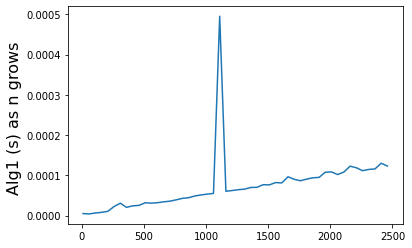

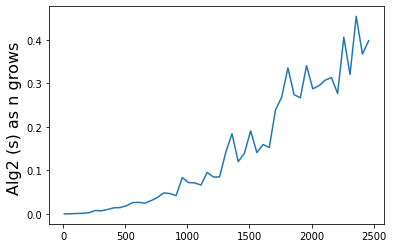

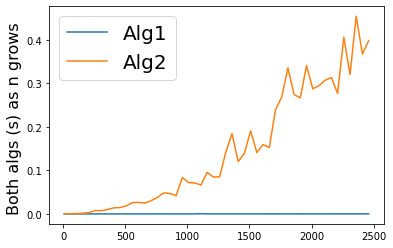

In [ ]:
# plot how the time of these two algorithms grows with data
import timeit

from matplotlib import pyplot as plt

r = range(10, 2500,50)
dt = []
dt2 = []

for i in r:
    aRandomList = randomIntList(i,0,25)

    start_time = timeit.default_timer()
    computeAverageTraversal(aRandomList)
    dt.append(timeit.default_timer()-start_time)

    start_time = timeit.default_timer()
    computeAverageSillyVersion(aRandomList)
    dt2.append(timeit.default_timer()-start_time)

plt.plot(r, dt)
plt.ylabel('Alg1 (s) as n grows ', fontsize=16)
plt.show()

plt.plot(r, dt2)
plt.ylabel('Alg2 (s) as n grows ', fontsize=16)
plt.show()

plt.plot(r, dt)
plt.plot(r, dt2)
plt.ylabel('Both algs (s) as n grows ', fontsize=16)
plt.legend(['Alg1', 'Alg2'], loc='best', fontsize=20)
plt.show()



最初の2つのプロットは、データサイズが大きくなると、アルゴリズムの実行時間がどのように伸びるかを示しています。また、アルゴリズム1の実行時間は、アルゴリズム2の実行時間よりもはるかに遅く成長することも明らかです。これは、3番目のプロットのように両方のアルゴリズムを一緒にプロットすると特に明らかです。

これで、アルゴリズム2がアルゴリズム1よりもはるかに遅いアルゴリズムであるという直感が得られたことを願っています。小さなリストで両方のアルゴリズムを実行するのにかかった時間は非常に近いものでしたが、データのサイズが大きくなるにつれて、アルゴリズム2は明らかになります。アルゴリズム1よりも遅い。つまり、これらは異なる成長パターンまたは傾向を示します。

**アルゴリズムの処理効率**の研究では、これらの傾向を理解することがすべてです。データのサイズが無限大になると、アルゴリズムは何をしますか?直感的に、この考えに従ってアルゴリズムをグループ化します。 n が大きくなるときのアルゴリズムの時間曲線に基づいて各グループに名前を付け、「大きな O」を使用して、アルゴリズムの処理効率について話していることを表します。

- 一部のアルゴリズムは、線を記述します。これらを「線形」と呼び、$\mathcal{O}(n)$ と記します。
- 二次方程式を説明するものもありますが、それらを二次と呼び、$\mathcal{O}(n^2)$ と記します。
- そして、残りのコースでは、他の処理効率クラスについてもかなり話をします。

## リストトラバーサルによる平均は線形です

このことがどのように機能するかについての直感を与えたことを願っています。これまで見てきたアルゴリズムはどうでしょうか?

アルゴリズム2は、ランダムな要素があるため、少し難しいです。このコースでは、ランダムな部分を含むアルゴリズムの複雑さを計算する方法について少し説明しますが、まだそれには触れません。アルゴリズム2が「遅い」としましょう。

アルゴリズム1はどうでしょうか？nが大きくなったときの傾向はどうでしょう？最初のプロットを見ると、アルゴリズムが (大まかに) 直線に従っていることがわかります。これは、リスト内の各要素を 1 回だけアクセスすると述べたので、これが起こると予想されることです。したがって、時間は要素の数と同じ割合で増加すると考えることは理にかなっています (そして、それらは線形関係になります)。このアルゴリズムを線形と呼び、$\mathcal{O}(n)$ グループに属しているとします。

ただし、線に「棘」があるため、プロットはあまりきれいではありません。これらは、関連する時間がすべて非常に小さく、実行間のわずかな違いが非常に大きく見え一般的な傾向の形をあいまいにする可能性があるために発生します。さらに、アルゴリズム1とアルゴリズム2を一緒にプロットすると、アルゴリズム1はまったく成長しないように見えます。これは、アルゴリズム1の成長を評価できないアルゴリズム2の大幅な成長に伴う問題です。

アルゴリズム1の傾向をもう少しよく見るために、少し大きなデータサイズを使用して単独でプロットしてみましょう。

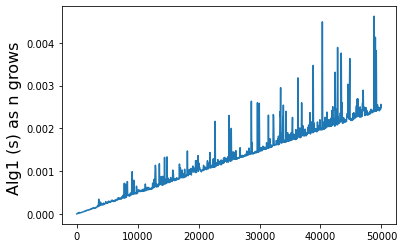

In [ ]:
# plot how algorithm1 grows with data
import timeit

from matplotlib import pyplot as plt

r = range(10, 50000,50)
dt = []

for i in r:
    aRandomList = randomIntList(i,0,25)

    start_time = timeit.default_timer()
    computeAverageTraversal(aRandomList)
    dt.append(timeit.default_timer()-start_time)


plt.plot(r, dt)
plt.ylabel('Alg1 (s) as n grows ', fontsize=16)
plt.show()

ここでは、傾向がより明確にわかります。全体的な傾向に比べてスパイクが小さく、直線的な傾向がより明確になっています。 **リストトラバーサルを使用したすべての整数リストの平均の計算は線形であることを直観的に示しました** ($\mathcal{O}(n)$ に属します)。

## 別の処理効率のクラス、定数アルゴリズム。

このユニットでやりたかったことはこれでほとんど網羅されましたが、その前にいくつかの事を簡単に言っておきます。1つ目は、すべてのアルゴリズムが線形であるとは限らないということです。二次傾向については以前に触れましたが (詳細については後で説明します)、定数アルゴリズムについても触れておきましょう。

一部のアルゴリズムでは、データのサイズが大きくなっても、実際には時間があまり変わりません。これらは 定数アルゴリズムと呼ばれ、$\mathcal{O}(1)$ で記されます。この例は、リスト内の要素へのアクセスです。

リスト専用の単元では、リストの位置がわかっていれば、リスト内の任意の要素に非常に便利にアクセスできる方法を見てきました。これは、要素の正しいメモリ位置に Python が「ジャンプ」することになるため、リストの大きさ (メモリに収まる限度) やアクセスしている位置には依存しません。

次のセルは、「range(i)」関数を使用してリストを作成し (したがって、0 から i-1 までのすべての整数が含まれます)、リストのランダムな位置にアクセスします。コードは最大500000要素のリストで実行するように設定されているため、これにはしばらく時間がかかります。

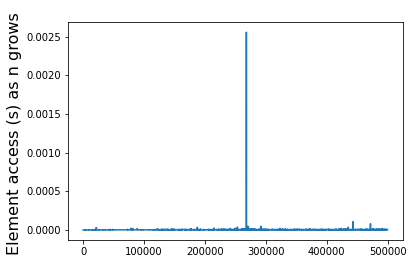

In [ ]:
# plot how accessing a random element in a list grows with data
import timeit
from random import randint
from matplotlib import pyplot as plt


max = 500000

r = range(10, max ,50)
dt = []

for i in r:
    aRandomList = list(range(i))
    randomPos = randint(0,i)

    start_time = timeit.default_timer()
    access = aRandomList[randomPos]
    dt.append(timeit.default_timer()-start_time)


plt.plot(r, dt)
plt.ylabel('Element access (s) as n grows ', fontsize=16)
plt.show()

多少の変化が観察できていますが、見ている時間はすべて-5桁であることに注目してください。

したがって、リストへのアクセス時間は、データサイズが非常に大きい場合でもあまり増加せず、リストへのアクセスには一定の時間がかかり、$\mathcal{O}(1)$ であると言えます。

この単元では、データのサイズが大きくなったときにアルゴリズムの実行時間が示す傾向を調べることで、アルゴリズムの処理効率を測定する方法を直感的に説明しました。 [ここでいくつかの詳細を確認でき](https://devopedia.org/algorithmic-complexity)、 [ここでより正式な定義を味わうことができます](https://medium.com/@koteswar.meesala/algorithms-time-complexity-9e0395c9ff69)。

最後に、次のプロットで最も一般的に使用される処理効率クラスの形状を示します。

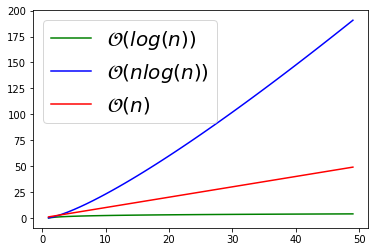

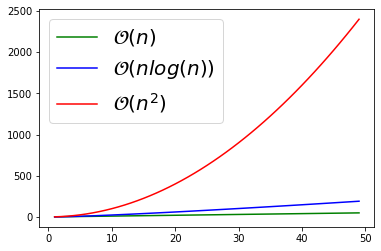

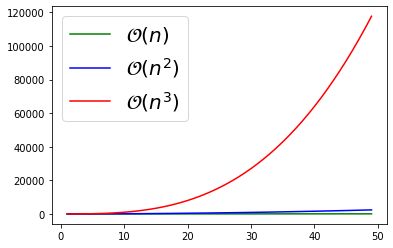

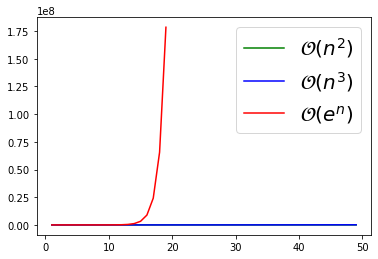

In [ ]:
# importing required modules
import matplotlib.pyplot as plt
import numpy as np
import math

# function to generate coordinates
def create_plot(ptype,maxVal,step):
    # setting the x-axis values
    x = np.arange(1, maxVal, step)

    # setting the y-axis values
    if ptype == 'linear':
        y = x
    elif ptype == 'logarithmic':
        y = np.array(list(map(lambda a : math.log(a),x)))
    elif ptype == 'quasilinear':
        y = np.array(list(map(lambda a : a * math.log(a),x)))
    elif ptype == 'quadratic':
        y = x**2
    elif ptype == 'cubic':
        y = x**3
    elif ptype == 'exponential':
        y = np.array(list(map(lambda a : np.exp(a),x)))

    return(x, y)

# plotting smaller functions first
x, y = create_plot('logarithmic',50,1)
plt.plot(x, y, color ='g')
x, y = create_plot('quasilinear',50,1)
plt.plot(x, y, color ='b')
x, y = create_plot('linear',50,1)
plt.plot(x, y, color ='r')
plt.legend(['$\mathcal{O}(log(n))$','$\mathcal{O}(n log(n))$','$\mathcal{O}(n)$'], loc='best', fontsize=20)
plt.show()

# plotting smaller functions first
x, y = create_plot('linear',50,1)
plt.plot(x, y, color ='g')
x, y = create_plot('quasilinear',50,1)
plt.plot(x, y, color ='b')
x, y = create_plot('quadratic',50,1)
plt.plot(x, y, color ='r')
plt.legend(['$\mathcal{O}(n)$','$\mathcal{O}(n log(n))$','$\mathcal{O}(n^2)$'], loc='best', fontsize=20)
plt.show()


x, y = create_plot('linear',50,1)
plt.plot(x, y, color ='g')
x, y = create_plot('quadratic',50,1)
plt.plot(x, y, color ='b')
x, y = create_plot('cubic',50,1)
plt.plot(x, y, color ='r')

plt.legend(['$\mathcal{O}(n)$','$\mathcal{O}(n ^2)$','$\mathcal{O}(n^3)$'], loc='best', fontsize=20)
plt.show()


x, y = create_plot('quadratic',50,1)
plt.plot(x, y, color ='g')
x, y = create_plot('cubic',50,1)
plt.plot(x, y, color ='b')
x, y = create_plot('exponential',20,1)
plt.plot(x, y, color ='r')

plt.legend(['$\mathcal{O}(n^2)$','$\mathcal{O}(n ^3)$','$\mathcal{O}(e^n)$'], loc='best', fontsize=20)
plt.show()


添付の参照元を確認すると、例えば[このような](https://miro.medium.com/max/1400/1*5ZLci3SuR0zM_QlZOADv8Q.jpeg)参照元では、各処理効率クラスを定義する関数の形状を示すことに多くの努力を払っていますが、その代償として互いの比較方法が見えなくなってしまっていることがわかります。このプロットは、関数がいつも私たちが見慣れている形をしているわけではないので見やすくはありませんが、異なる関数が互いに比較してどのように成長していくかを非常に忠実に示しています。

Python を深く掘り下げることに興味がある方は、上記のプロットで「maps」が使用されていることに注目してください。それらについては、後のコースでもう少し詳しく説明します。

# 演習

## 演習 1:

Pythonのリストで検索を実行する際の漸近的なコストはいくらですか？次のセッションでは、「最悪の場合のコスト」について話しますので、質問に答えるためにそれを調べてみてください。

In [ ]:
# Ex1

## 演習 2:

ある問題を解くために2つのアルゴリズムにアクセスできたとする（例えば教科書に載っている）。最初のものは非常に複雑なデータ構造を使っているが、最適である。実装には1週間かかる。

2番目のものは非常に単純ですが、「$\mathcal{O}$」の処理効率の点で、最適とはほど遠いものです。

どちらを使用する必要がありますか?

## 演習 3:

### 3.1

入力として整数のリスト "l" を取得し、2 番目のリストを返す Python 関数を書きなさい。戻り値のリストには、各位置 p において、l の要素のうち何個が l\[p\]よりも大きいかが含まれている。リストと要素が与えられたとき、その要素より大きいリストの値の数を返す2番目の関数「howManyBigger」を使って、これを解決する。
### 3.2

問題をもう一度解決しますが、最初に元のリストをソートすることから始めます。この場合、**関数 "howManyBigger"** を使用する必要はありません。

### 3.3

この単元で見られるコードを使用して、異なるデータ サイズで 2 つの関数を実行し、実行時間をプロットします。それらの漸近的な複雑さを推測できますか?

In [ ]:
# Ex3.1

# Ex3.2

# Ex3.3


# 終わり！

[インデックスに戻る](https://colab.research.google.com/drive/1wYIcjC74RnB3HcpqCWWoXLUjVlD8N1YU?usp=sharing), [ユーチューブチャンネル](https://www.youtube.com/channel/UCDxi6j88IlZXsRcAUXlscgw)